# Project: Bank Fraud Detection

**We will use logistic regression and neural network to solve a bank fraud detection case.**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, model_selection, linear_model, metrics
import os

**Data:**
There are 23 features for each user, which are discribed below

**id**: A unique Id field which represents a customer

**X1**: Credit line

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. 

**X6** = September, 2015;

**X7** = August, 2015;

**...**

**X11** =April, 2015; where -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**X12- X17**: Amount in bill statement.

**X12** = amount of bill statement September, 2015

**X13** = amount of bill statement August, 2015

**...**

**X17** = amount of bill statement April, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; 

**X19** = amount paid in August, 2015; 

**...**

**X23** = amount paid in April, 2015.

**Y**: Whether the customer is creditable (1) or not (0).

### 1. Load data

In [12]:
train = pd.read_csv('/Users/Rockwell/Desktop/Bank-Fraud-Detection/train.csv')
train.head(5)

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [10]:
train.shape

(25000, 25)

In [23]:
# check missing values
train.isna().sum().sum() 

0

**Hence, no missing value.**

In [20]:
# Check the value types
train.dtypes

id     int64
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

**All in integers.**

In [28]:
# find the categorical features
train.nunique()

id     25000
X1        79
X2         2
X3         7
X4         4
X5        56
X6        11
X7        11
X8        11
X9        11
X10       10
X11       10
X12    19387
X13    19025
X14    18745
X15    18423
X16    17923
X17    17577
X18     7150
X19     7062
X20     6697
X21     6217
X22     6143
X23     6169
Y          2
dtype: int64

**It can be seen that X2, X3, X4 are categorical features, i.e.,**

**X2**: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

**X4**: Marital status (1 = married; 2 = single; 3 = others).

**Also X1, X5, X6 - X11 are discrete features**

**X1**: Credit line

**X5**: Age (year).

**X6 - X11**: History of past payment, where -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.

**Last other features are continuous features**

**X12- X17**: Amount in bill statement.

**X18-X23**: Amount of previous payment

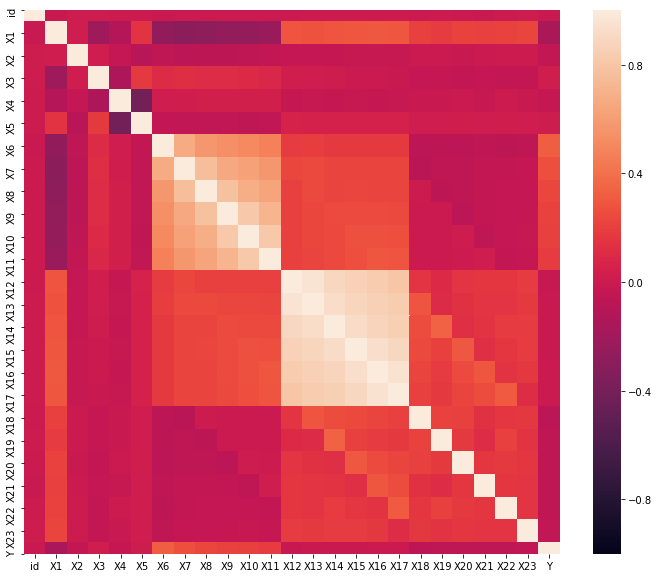

In [54]:
# Check the correlations (it doesn't hurt to include all, since they are all ingeters)
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),vmin=-1, vmax=1)
plt.show()

In [ ]:
# split the data to train and validation set
X_train, X_test, y_train, y_test = model_selection.train_test_split(train[:,:-2], Y, test_size=0.2)

**2. check the data quality**

In [6]:
test3 = pd.read_csv('/Users/Rockwell/Desktop/Bank-Fraud-Detection/train.csv')
test3

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,300000,2,1,1,56,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
24996,24997,230000,2,2,1,36,0,0,0,2,...,631,1635,10244,3000,2023,0,1004,10019,1141,0
24997,24998,30000,2,2,2,23,2,2,2,2,...,41931,38638,35343,0,1800,9851,0,1183,5132,0
24998,24999,360000,1,1,1,36,0,0,0,0,...,36491,41179,45823,3000,3000,3000,5000,5000,5000,0


In [5]:
test2 = pd.read_csv('/Users/Rockwell/Desktop/Bank-Fraud-Detection/test.csv')
test2

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,25001,180000,1,1,2,27,-1,0,0,0,...,6482,3246,2016,2334,12000,5004,1000,1000,2300,3000
1,25002,230000,2,3,1,52,-2,-2,-2,-2,...,2233,1410,0,0,3939,2244,1421,0,0,236
2,25003,150000,2,1,2,28,-1,-1,2,-1,...,1159,1159,11476,10249,2468,0,1159,11476,0,2034
3,25004,160000,1,1,1,40,0,0,2,2,...,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,25005,20000,2,2,2,26,0,0,0,0,...,8515,6584,3403,3748,2600,1500,1500,1000,402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29996,120000,2,1,2,25,-1,-1,-1,-1,...,3938,1110,9848,3301,12557,3938,1110,9848,3301,0
4996,29997,200000,2,2,1,39,0,0,2,0,...,149765,131741,134488,137240,9201,5000,4500,4600,4700,5319
4997,29998,370000,1,1,2,30,0,0,0,0,...,285705,295747,250158,255956,13000,11000,15000,10000,10000,12000
4998,29999,20000,1,2,1,35,1,2,2,0,...,20018,20427,19377,19386,1000,1000,1000,1500,900,1000
